# Admission in the University Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../datasets/adm_data.csv', index_col=0)
df.columns= df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

C:\Users\sonba\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [2]:
df.shape

(400, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          400 non-null    int64  
 1   toefl_score        400 non-null    int64  
 2   university_rating  400 non-null    int64  
 3   sop                400 non-null    float64
 4   lor                400 non-null    float64
 5   cgpa               400 non-null    float64
 6   research           400 non-null    int64  
 7   chance_of_admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [4]:
df.describe()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


- Data types are logical
- No null values

## EDA

In [5]:
sns.set_style('darkgrid')
sns.set_palette("deep")

### Correlation and Heatmap

In [6]:
df.corr()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
gre_score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
toefl_score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
university_rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
sop,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
lor,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
cgpa,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
chance_of_admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot: >

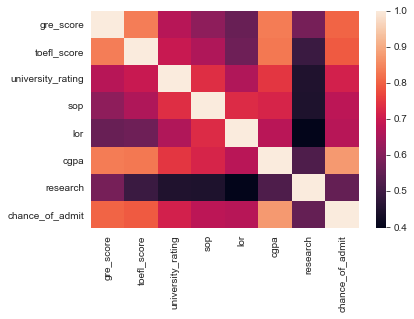

In [7]:
sns.heatmap(df.corr(),linecolor='white')

- Chance of Admission is high correlated with CPGA followed by GRE and TOEFL
- GRE and TOEFL are highly correlated
- CGPA is highly correlated with GRE and TOEFL scores

### CPGA distribution

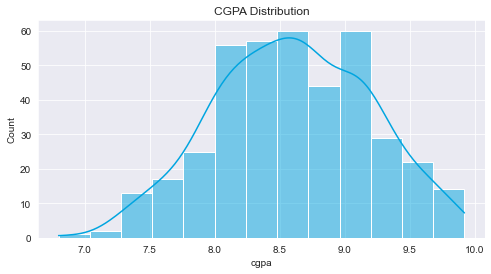

In [8]:
plt.figure(figsize=(8,4))

sns.histplot(x="cgpa", data=df,color='#00A5E0', kde=True,lw=1).set(title = 'CGPA Distribution');

### GRE and TOEFL distribution

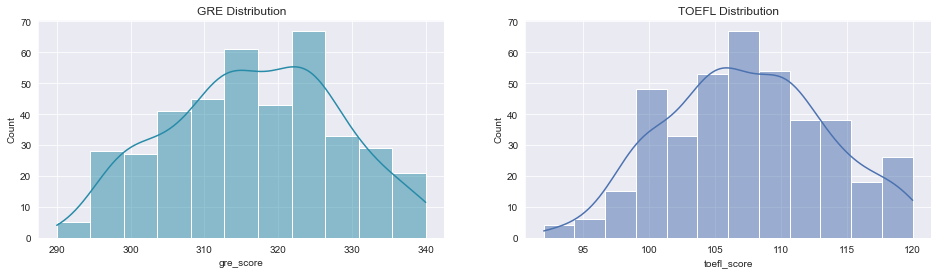

In [9]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
sns.histplot(x="gre_score", data=df,color='#288BA8', kde=True,lw=1).set(title = 'GRE Distribution')

plt.subplot(1, 2, 2)
sns.histplot(x="toefl_score", data=df, kde=True,lw=1).set(title = 'TOEFL Distribution');

### Categorical Data Visualization

#### University Rating Countplot

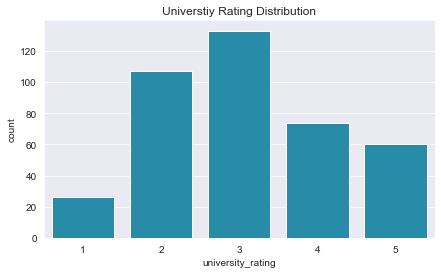

In [10]:
plt.figure(figsize=(7, 4))
sns.countplot(x="university_rating", data=df, color='#288BA8', saturation=1).set(title = 'Universtiy Rating Distribution');

#### SOP Countplot

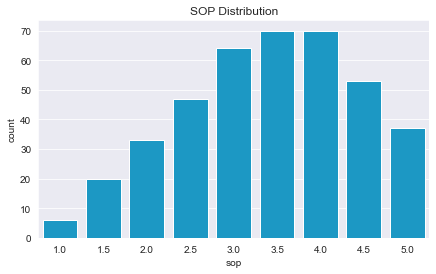

In [11]:
plt.figure(figsize=(7, 4))
sns.countplot(x="sop", data=df, color='#00A5E0').set(title = 'SOP Distribution');

#### LOR Countplot

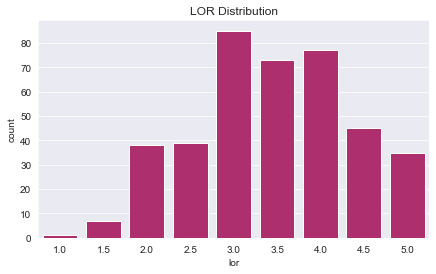

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(x="lor", data=df, color='#C21A6C').set(title = 'LOR Distribution');

#### Research Countplot

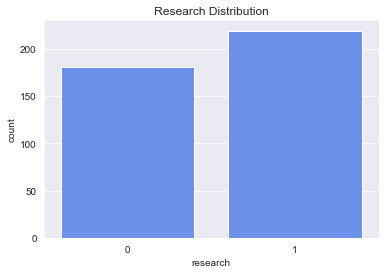

In [13]:
sns.countplot(x="research", data=df, color='#5887FF').set(title = 'Research Distribution');

#### Countplot for the Research & University Rating respective of each other

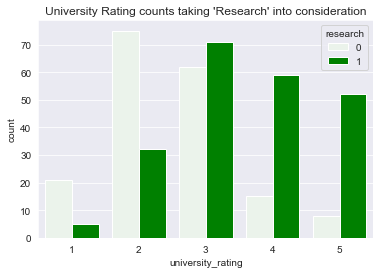

In [14]:
sns.countplot(x=df['university_rating'],hue=df['research'],saturation=1,color='green').set(title = "University Rating counts taking 'Research' into consideration");

### Scatter Plots for CPGA, GRE and TOEFL

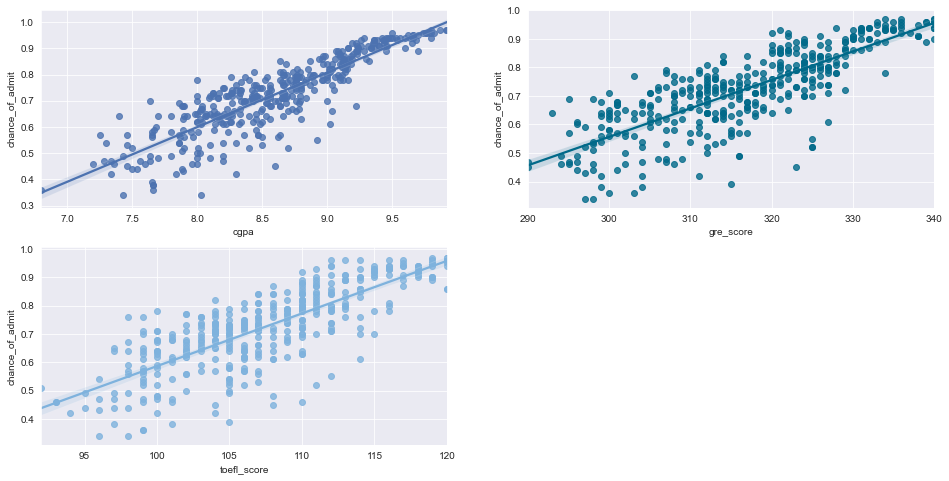

In [15]:
plt.figure(figsize=(16,8))

plt.subplot(2, 2, 1)
sns.regplot(data=df, x='cgpa', y='chance_of_admit')

plt.subplot(2, 2, 2)
sns.regplot(data=df, x='gre_score',color='#006989', y='chance_of_admit')

plt.subplot(2, 2, 3)
sns.regplot(data=df, x='toefl_score',color= '#7EB2DD', y='chance_of_admit');

We can observe the correlations noted bofore

### Regression Plot (lmplot) for showcasing the corr between 'Chance of Admit' & other paramaters taking 'Research' into consideration

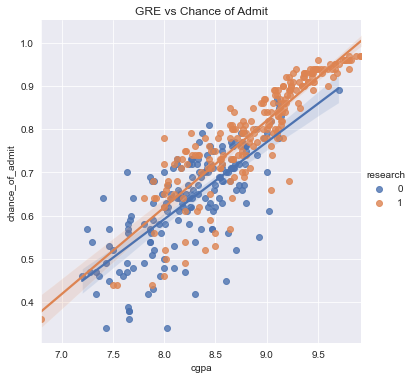

In [16]:
sns.lmplot(x='cgpa',y='chance_of_admit',data=df,hue='research').set(title='GRE vs Chance of Admit');

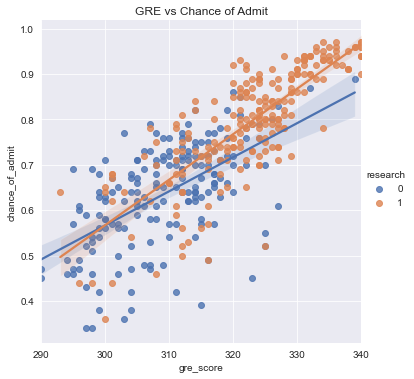

In [17]:
sns.lmplot(x='gre_score',y='chance_of_admit',data=df,hue='research').set(title='GRE vs Chance of Admit');

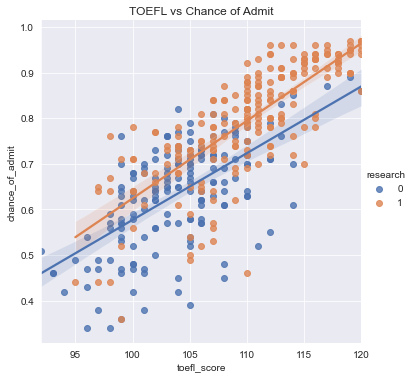

In [18]:
sns.lmplot(x='toefl_score',y='chance_of_admit',data=df,hue='research').set(title='TOEFL vs Chance of Admit');

## Insights

- Chance of Amission is highly correlated with CGPA followed by GRE and TOEFL scores, which makes sense.
- Research students have a left skewed distribution with the university rating, which means they are more likely to apply in higher rated universities.
- No research students are exactly the opposite.
- Regression Plot showed that being a research student generally gives a better admission chance considering (CPGA, GRE, TOEFL)